In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pulses

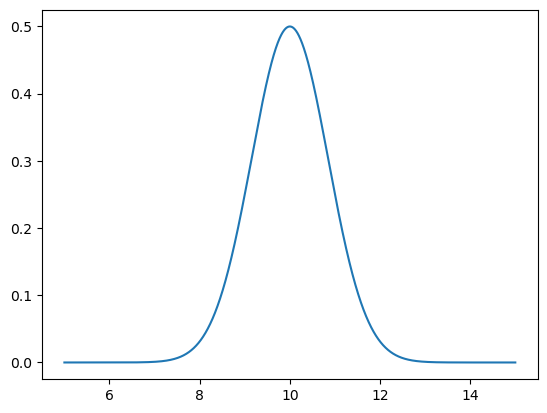

In [2]:
pulse = pulses.gaussian_pulse(10, 2, np.pi)

w_s = np.linspace(-5, 5, 10000) + 10
f = lambda w: pulse.spectrum(w)*pulse.notch(w)*pulse.chirp(w)

plt.plot(w_s, np.abs(f(w_s)))
#plt.plot(w_s, np.angle(f(w_s)))

In [3]:
E_ = pulse.time_dependant_field_fft()

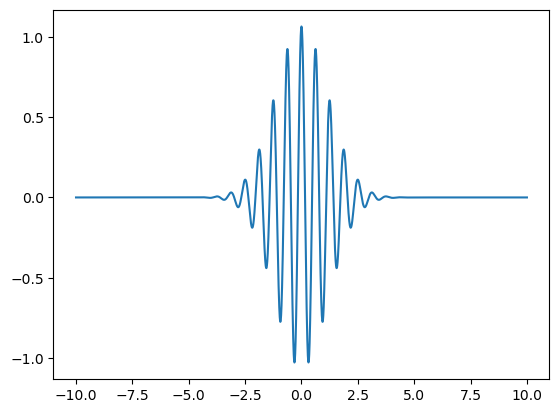

In [6]:
time = np.linspace(-10, 10, 10_000)
field = E_(time)
plt.plot(time, np.real(field))
plt.show()

In [5]:
np.sum((np.abs(field[1:])+np.abs(field[:-1]))/2)*(time[1]-time[0])

3.1415926535885856

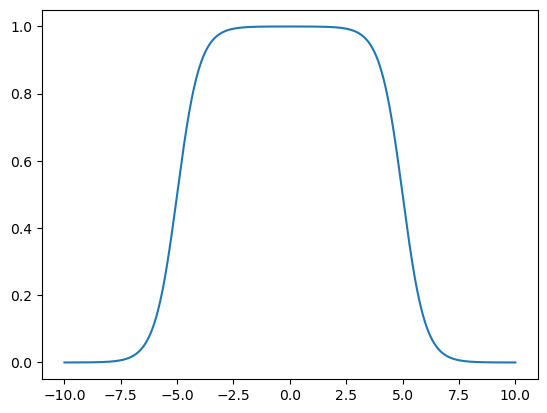

In [ ]:
def smooth_square(x: float, x0: float, delta: float, smoothness: float = .5):
    left_edge = 1 / (1 + np.exp(-(x - (x0 - delta))/smoothness))
    right_edge = 1 / (1 + np.exp((x - (x0 + delta))/smoothness))
    return left_edge*right_edge

plt.plot(time, smooth_square(time, 0, 5, .5))